<a href="https://colab.research.google.com/github/amrahmani/Machine-Learning/blob/main/Ch7_EnsambleLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem 1:** Predicting whether a student will pass (1) or fail (0) based on
'Assignments Completed', 'Attendance Rate', 'Previous GPA', 'Study Hours', 'Previous Passes'.

Dataset = 'https://github.com/amrahmani/Machine-Learning/blob/main/student_data.csv'.

Objective: Fit a **Random Forest** classifier to the data to predict the probability of passing for a new student.

Accuracy: 1.00


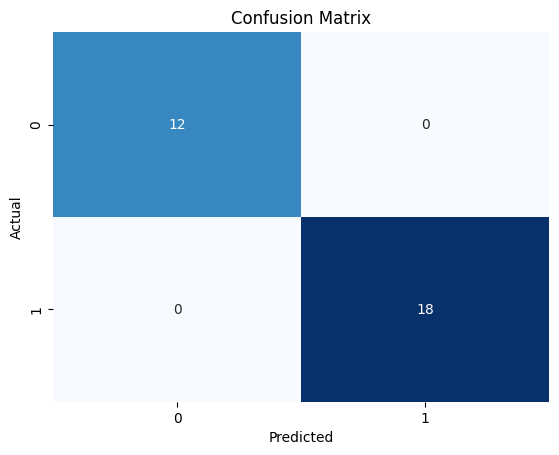

<ipython-input-2-b390a893fe17>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


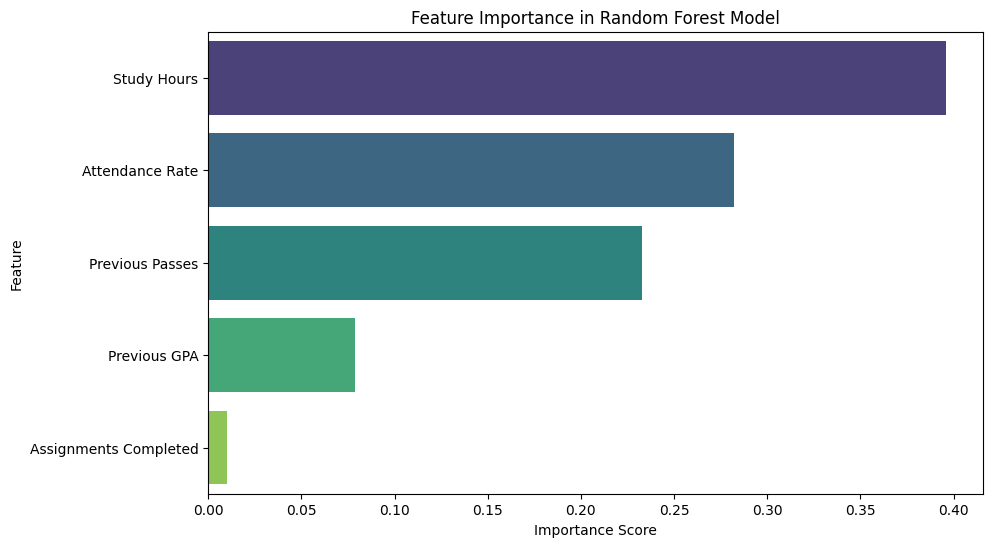

Probability of Passing for the new student: 0.41


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/amrahmani/Machine-Learning/main/student_data.csv'

# Read the CSV file into a Pandas DataFrame
# A DataFrame in Pandas is a two-dimensional, labeled data structure with columns of potentially different types.
df = pd.read_csv(url)

# Feature Selection
features = ['Assignments Completed', 'Attendance Rate', 'Previous GPA', 'Study Hours', 'Previous Passes']
X = df[features]
y = df['Pass/Fail']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Extract feature importances
importances = clf.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# Predicting probability for a new student
new_student = np.array([[8, 85, 3.5, 10, 2]])  # Example new student features
probability_of_passing = clf.predict_proba(new_student)[:, 1]
print(f"Probability of Passing for the new student: {probability_of_passing[0]:.2f}")


**Problem 2:** Fit a Decision Tree classifier using **Bagging** to predict whether a student will pass (1) or fail (0) based on two predictor variables: Attendance rate and Previous GPA.

Dataset = 'https://github.com/amrahmani/Machine-Learning/blob/main/student_data.csv'

   Student ID  Assignments Completed  Attendance Rate  Previous GPA  \
0           1                     11             0.76          3.41   
1           2                      8             0.84          3.24   
2           3                     12             1.00          2.86   
3           4                      9             0.74          3.53   
4           5                     11             0.95          3.43   

   Study Hours  Previous Passes  Pass/Fail  
0            3                1          0  
1           19                5          1  
2           20                4          1  
3            1                2          0  
4           21                5          1  
Accuracy of Bagging classifier: 1.00
Confusion Matrix for Bagging Classifier:
[[12  0]
 [ 0 18]]


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


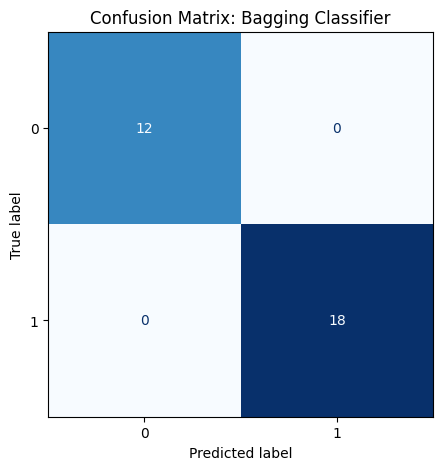

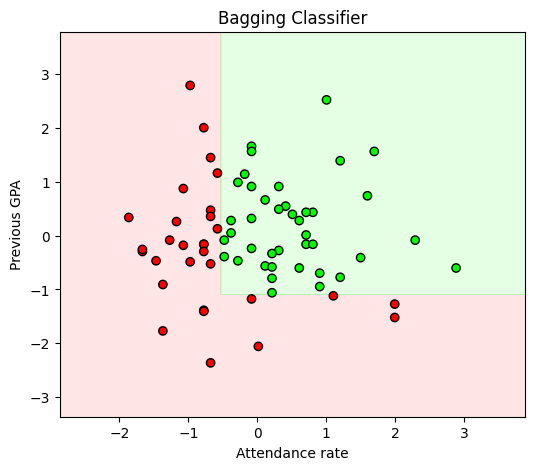

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

# Load the dataset
url = 'https://raw.githubusercontent.com/amrahmani/Machine-Learning/main/student_data.csv'

# Read the CSV file into a Pandas DataFrame
# A DataFrame in Pandas is a two-dimensional, labeled data structure with columns of potentially different types.
df = pd.read_csv(url)
# Inspect the first few rows of the dataset
print(df.head())

# Data preprocessing
df = df.dropna()  # Remove rows with missing values
# [['Assignments Completed', 'Attendance Rate', 'Previous GPA', 'Study Hours', 'Previous Passes']]
X = df[['Attendance Rate', 'Previous GPA']]
y = df['Pass/Fail']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Bagging classifier with Decision Trees
# base_estimator=DecisionTreeClassifier(): The type of model to be used as the base estimator for the ensemble. In this case, a DecisionTreeClassifier
# n_estimators=20: This sets the number of base estimators (decision trees) to be created in the ensemble. In this case, 250 decision trees will be built.
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=20, random_state=42)
bagging_clf.fit(X_train_scaled, y_train)
y_pred_bagging = bagging_clf.predict(X_test_scaled)

# Print accuracy
print(f'Accuracy of Bagging classifier: {accuracy_score(y_test, y_pred_bagging):.2f}')

# Print confusion matrix
cm_bagging = confusion_matrix(y_test, y_pred_bagging)

print("Confusion Matrix for Bagging Classifier:")
print(cm_bagging)

# Display confusion matrix
fig, ax = plt.subplots(figsize=(6, 5))
disp_bagging = ConfusionMatrixDisplay(confusion_matrix=cm_bagging)
disp_bagging.plot(ax=ax, colorbar=False, cmap=plt.cm.Blues)
ax.set_title('Confusion Matrix: Bagging Classifier')
plt.show()

# Visualization
def plot_decision_boundary(clf, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#ffaaaa', '#aaffaa']))
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=ListedColormap(['#ff0000', '#00ff00']))
    ax.set_title(title)
    ax.set_xlabel('Attendance rate')
    ax.set_ylabel('Previous GPA')

# Plot decision boundaries
fig, ax = plt.subplots(figsize=(6, 5))  # Create figure with one subplot
plot_decision_boundary(bagging_clf, X_train_scaled, y_train, ax, 'Bagging Classifier')
plt.show()


**Problem 3:** Fit the following classifiers (**Single**, **Bagging**, and **Boosting**) to predict whether a student will pass (1) or fail (0) based on two predictor variables: Attendance rate and Previous GPA, then compare the results.
    "Decision Tree", "Bagging", "AdaBoost", "Random Forest", "Gradient Boosting"
Dataset = 'https://github.com/amrahmani/Machine-Learning/blob/main/student_data.csv'

   Student ID  Assignments Completed  Attendance Rate  Previous GPA  \
0           1                     11             0.76          3.41   
1           2                      8             0.84          3.24   
2           3                     12             1.00          2.86   
3           4                      9             0.74          3.53   
4           5                     11             0.95          3.43   

   Study Hours  Previous Passes  Pass/Fail  
0            3                1          0  
1           19                5          1  
2           20                4          1  
3            1                2          0  
4           21                5          1  


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy of Decision Tree: 1.00
Accuracy of Bagging: 1.00
Accuracy of AdaBoost: 1.00
Accuracy of Random Forest: 1.00
Accuracy of Gradient Boosting: 1.00


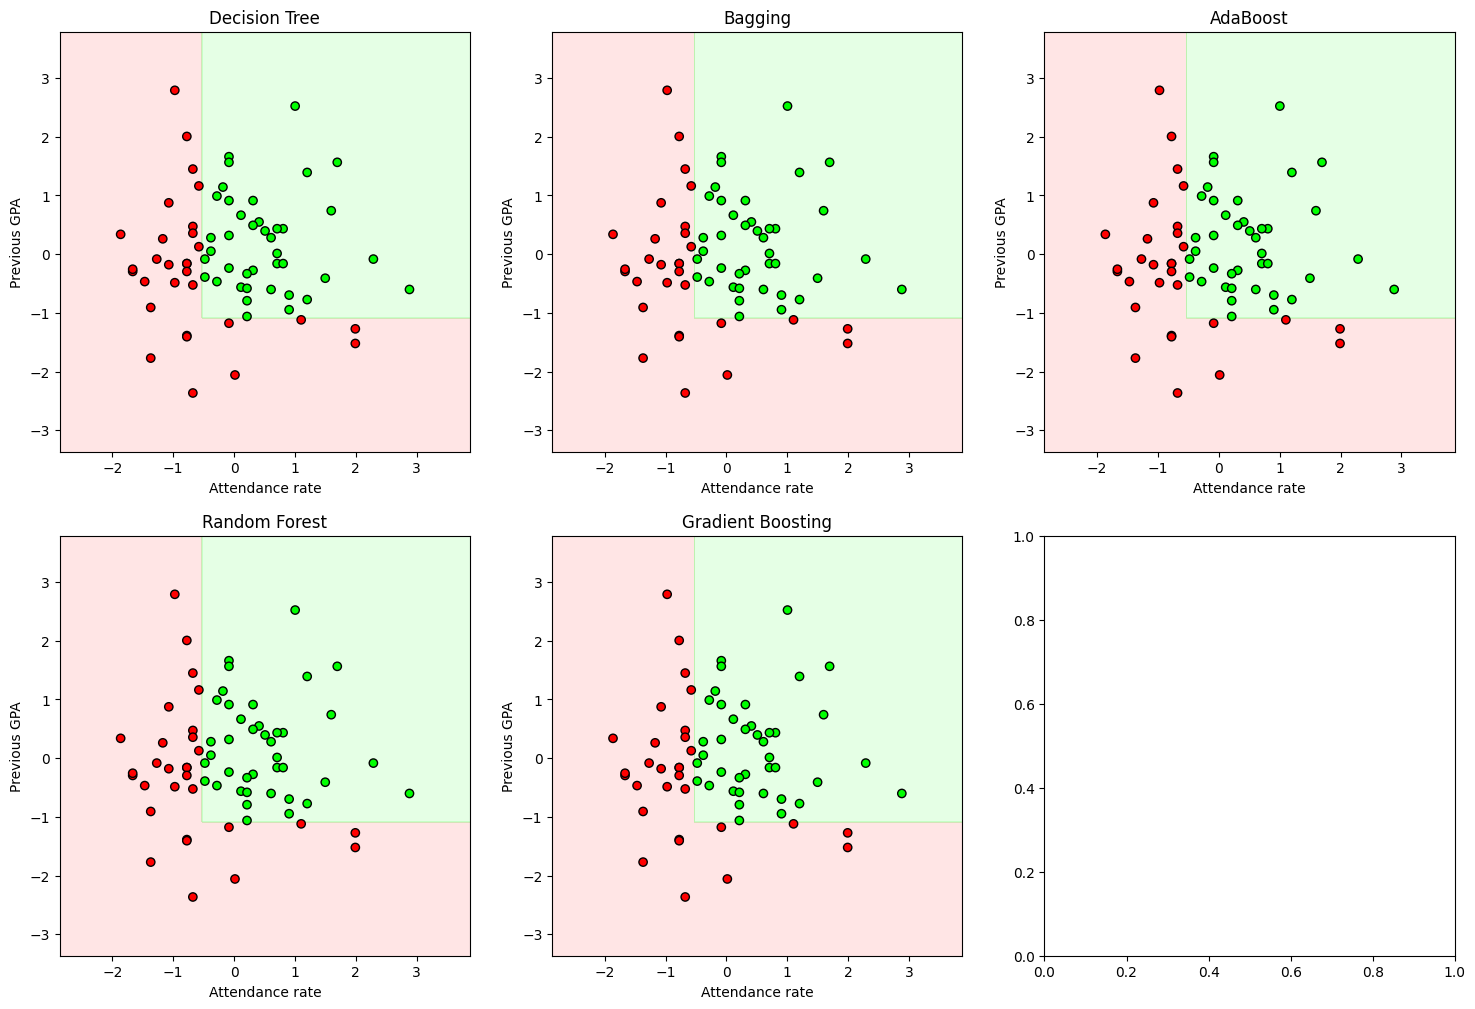

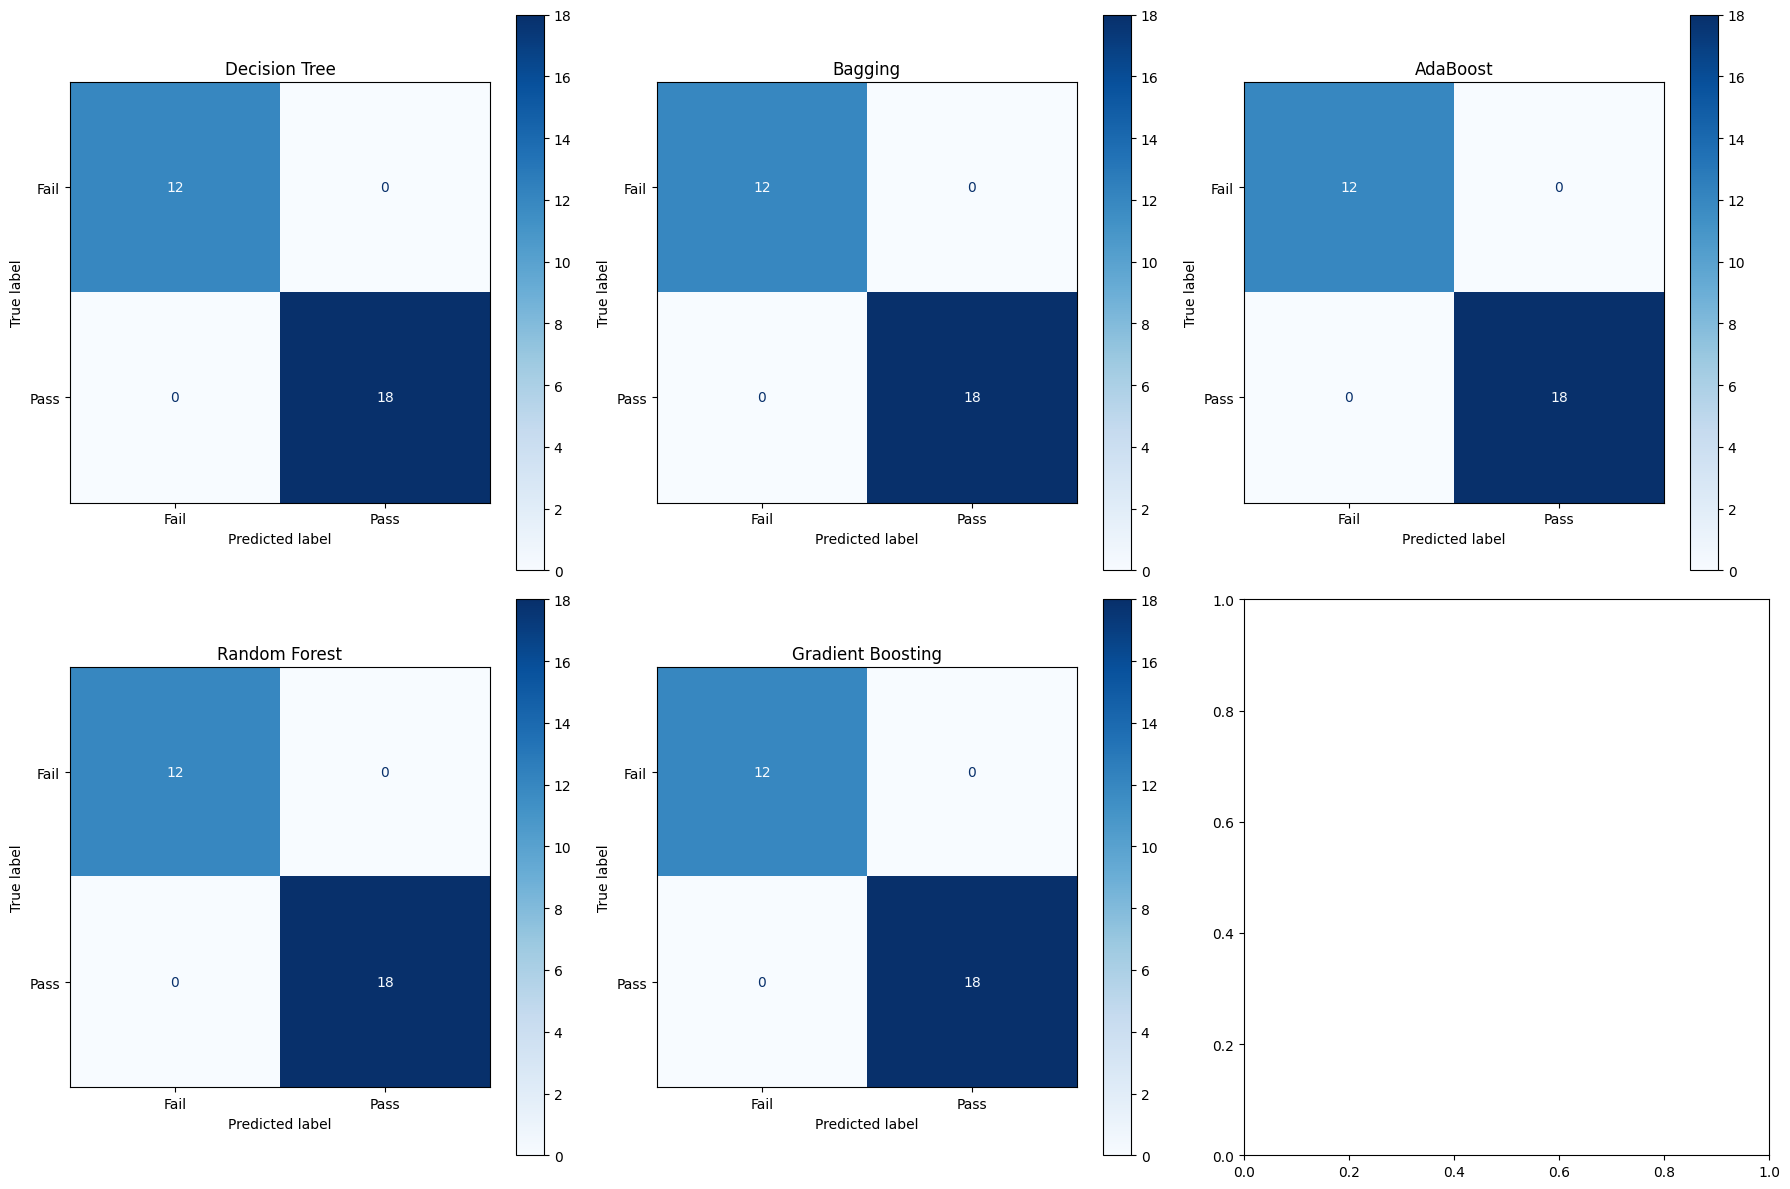

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

# Load the dataset
url = 'https://raw.githubusercontent.com/amrahmani/Machine-Learning/main/student_data.csv'

# Read the CSV file into a Pandas DataFrame
# A DataFrame in Pandas is a two-dimensional, labeled data structure with columns of potentially different types.
df = pd.read_csv(url)
# Inspect the first few rows of the dataset
print(df.head())

# Data preprocessing
df = df.dropna()  # Remove rows with missing values
X = df[['Attendance Rate', 'Previous GPA']]
y = df['Pass/Fail']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define classifiers
classifiers = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Bagging": BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42),
    "AdaBoost": AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=50, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=50, random_state=42)
}

# Fit models and make predictions
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    results[name] = (accuracy, cm)

# Print accuracy scores
for name, (accuracy, _) in results.items():
    print(f'Accuracy of {name}: {accuracy:.2f}')

# Plot decision boundaries and confusion matrices
def plot_decision_boundary(clf, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#ffaaaa', '#aaffaa']))
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=ListedColormap(['#ff0000', '#00ff00']))
    ax.set_title(title)
    ax.set_xlabel('Attendance rate')
    ax.set_ylabel('Previous GPA')

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot decision boundaries
for ax, (name, clf) in zip(axes.flatten(), classifiers.items()):
    plot_decision_boundary(clf, X_train_scaled, y_train, ax, name)

# Plot confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
for ax, (name, (_, cm)) in zip(axes.flatten(), results.items()):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fail', 'Pass'])
    disp.plot(ax=ax, cmap=plt.cm.Blues, values_format='d')
    ax.set_title(name)

plt.tight_layout()
plt.show()

**Practice**:


**Task 1:** For Problem 1, explore different hyperparameters settings (e.g., "*n_estimators, bootstrap, max_features*".

**Task 2:** For Problem 1, use the "_feature_importances__" attribute of the Random Forest model to rank the features. Visualize feature importance and discuss which features contribute most to the prediction.

**Task 3:** For Problem 2, discuss the hyperparameters of BaggingClassifier like n_estimators. Experiment with different hyperparameters and analyze the effect on model performance.

**Task 4:** For Problem 3, analyze the decision boundaries of different models and interpret their predictions visually.

**Task 5:** For Problem 3, find a similar dataset from Kaggle and apply the same process of training, tuning hyperparameters, and evaluating the model.